<img align="right" width="200" height="200" src="https://static.wikia.nocookie.net/lego/images/2/23/PPG_logo.png">

# <span style="color:#EF7C8E">Random Forest</span>
### <span style="color:#726060"> Sara Aldubaie</span>
<hr style="border:2px solid gray"> </hr>

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# Bank dataset

In [2]:
df = pd.read_csv("./data/bank.csv" , sep = ';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
# print value counts of all the columns
for col in df.columns:
    if not col in ['age', 'balance' , 'duration', 'campaign', 'pdays', 'month', 'day', 'previous' ]:
        print(col,':')
        print(df[col].value_counts().to_string())


job :
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
marital :
married     2797
single      1196
divorced     528
education :
secondary    2306
tertiary     1350
primary       678
unknown       187
default :
no     4445
yes      76
housing :
yes    2559
no     1962
loan :
no     3830
yes     691
contact :
cellular     2896
unknown      1324
telephone     301
poutcome :
unknown    3705
failure     490
other       197
success     129
y :
no     4000
yes     521


In [6]:
# convert month name into number
df.month = pd.to_datetime(df.month,format='%b').dt.strftime('%m')

In [7]:
# replace yes with 1 and no with 0
df = df.replace("yes", 1)
df = df.replace("no", 0)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,10,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,05,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,04,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,06,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,05,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,07,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,05,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,08,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,02,129,4,211,3,other,0


In [8]:
#split dataset in features and target variable
feature_cols = ['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']
X = df[feature_cols]          # Features
y = df.y                      # Target 

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42) # 80% training and 20% test
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
978,34,entrepreneur,divorced,tertiary,0,262,0,0,cellular,20,11,371,1,-1,0,unknown
251,32,management,married,tertiary,0,2349,0,0,cellular,14,08,134,5,-1,0,unknown
3139,34,technician,single,secondary,0,1076,0,0,cellular,8,08,70,2,-1,0,unknown
1822,31,management,married,tertiary,0,156,0,0,cellular,13,08,657,7,-1,0,unknown
4445,46,blue-collar,married,primary,0,258,1,0,unknown,27,05,217,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,41,admin.,married,tertiary,0,1536,0,0,cellular,4,05,54,2,-1,0,unknown
466,34,self-employed,married,secondary,0,-370,1,0,unknown,21,05,748,1,-1,0,unknown
3092,46,management,married,tertiary,0,523,1,0,cellular,6,05,105,4,366,2,failure
3772,47,management,single,tertiary,0,440,0,0,cellular,21,08,71,4,-1,0,unknown


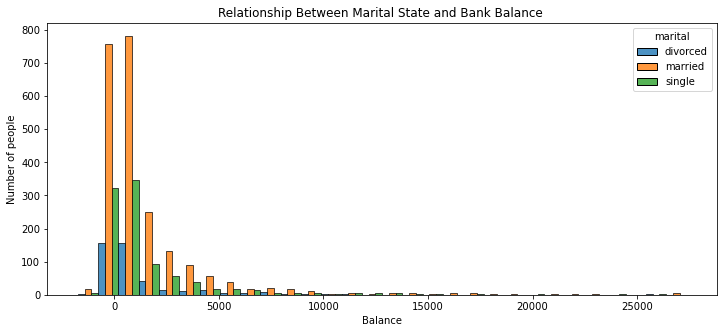

In [9]:
plt.figure(figsize=(12,5)) # figure size 

b2 = sns.histplot(
    X_train,                     # data 
    x= 'balance',                # balance
    hue='marital',               # marital state
    multiple="dodge",            # aside  
    alpha=.8,                    # transparency
    bins=30,                     # number of bins
)

plt.title("Relationship Between Marital State and Bank Balance ")
plt.xlabel('Balance')
plt.ylabel('Number of people')
plt.show()

### Insights: 
- most people in the dataset are married. 
- most of them have near-zero bank balances!!.

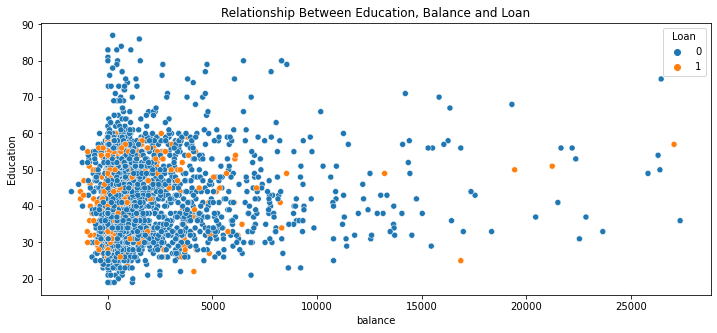

In [10]:
plt.figure(figsize=(12,5)) # figure size 
sns.scatterplot(data=X_train,  
                x="balance", 
                y="age", 
                hue='loan', 
                )
plt.title("Relationship Between Education, Balance and Loan")
plt.legend(title = "Loan",loc='upper right')
plt.ylabel('Education')
plt.show()

### Insights: 
- after the age of 60, there are no people with loans.
- Most of the people have no loan. 
- Most people have an account balance between 0 and 5000.

In [11]:
#encoding using dummies 
X_train = pd.get_dummies(X_train, columns = ['job','marital','education', 'contact', 'poutcome'])
X_test = pd.get_dummies(X_test, columns = ['job','marital','education', 'contact', 'poutcome'])
X_train

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
978,34,0,262,0,0,20,11,371,1,-1,...,0,1,0,1,0,0,0,0,0,1
251,32,0,2349,0,0,14,08,134,5,-1,...,0,1,0,1,0,0,0,0,0,1
3139,34,0,1076,0,0,8,08,70,2,-1,...,1,0,0,1,0,0,0,0,0,1
1822,31,0,156,0,0,13,08,657,7,-1,...,0,1,0,1,0,0,0,0,0,1
4445,46,0,258,1,0,27,05,217,1,-1,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,41,0,1536,0,0,4,05,54,2,-1,...,0,1,0,1,0,0,0,0,0,1
466,34,0,-370,1,0,21,05,748,1,-1,...,1,0,0,0,0,1,0,0,0,1
3092,46,0,523,1,0,6,05,105,4,366,...,0,1,0,1,0,0,1,0,0,0
3772,47,0,440,0,0,21,08,71,4,-1,...,0,1,0,1,0,0,0,0,0,1


In [12]:
print(X_train.shape)
print(X_test.shape)

(3616, 37)
(905, 37)


In [13]:
class_forest = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 42)
class_forest.fit(X_train, y_train)

preds_class = class_forest.predict(X_test)

In [14]:
val_train = round(class_forest.score(X_train, y_train),2)*100
val_test = round(class_forest.score(X_test, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 99.0%
Test Set Accuracy: 90.0%


In [15]:
# Baseline 
Baseline = y_train.value_counts(normalize=True)
Baseline

0    0.88302
1    0.11698
Name: y, dtype: float64

In [16]:
print('--'*20)
print('Baseline:')
print('Accuracy: ',Baseline[0])
print('--'*20)
# Model Accuracy, recall, and precision
print('Random Forest:')
print("Accuracy: ",(metrics.accuracy_score(y_test, preds_class,)),
      "\nRecall:   ",metrics.recall_score(y_test, preds_class),
      "\nPrecision:",metrics.precision_score(y_test, preds_class))
print('--'*20)
print('The Random Forest outperform the Baseline ')

----------------------------------------
Baseline:
Accuracy:  0.8830199115044248
----------------------------------------
Random Forest:
Accuracy:  0.901657458563536 
Recall:    0.21428571428571427 
Precision: 0.6363636363636364
----------------------------------------
The Random Forest outperform the Baseline 


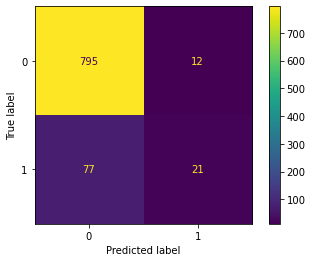

In [17]:
# We can also make a simple confusion matrix
plot_confusion_matrix(class_forest, X_test, y_test);

# U.S. Pollution Dataset

In [18]:
df = pd.read_csv("./data/pollution_us_2000_2016.csv")
# view data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head())

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,10,34,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,36.0,19,34,Parts per million,0.013375,0.032,10,27,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [19]:
#split dataset in features and target variable
feature_cols = ['NO2 Mean','NO2 1st Max Value','NO2 AQI','O3 Mean','O3 1st Max Value','O3 AQI','SO2 Mean','SO2 1st Max Value','SO2 AQI','CO Mean','CO 1st Max Value']
X = df[feature_cols]          # Features
y = df['CO AQI']              # Target 

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42) # 80% training and 20% test
X_train.head()

,NO2 Mean,NO2 1st Max Value,NO2 AQI,O3 Mean,O3 1st Max Value,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 AQI,CO Mean,CO 1st Max Value
751162,16.043478,32.0,30,0.009625,0.020,17,1.130435,4.0,6.0,0.327778,0.600
1479254,2.665217,7.9,7,0.026250,0.037,34,0.285714,0.5,NaN,0.243478,0.300
530440,24.166667,49.0,46,0.017958,0.044,37,3.291667,5.0,7.0,0.475000,1.200
1021760,13.521739,25.0,24,0.029375,0.045,38,0.300000,0.6,NaN,0.225000,0.300
594477,7.916667,14.0,13,0.025125,0.035,30,1.087500,2.3,NaN,0.221833,0.285


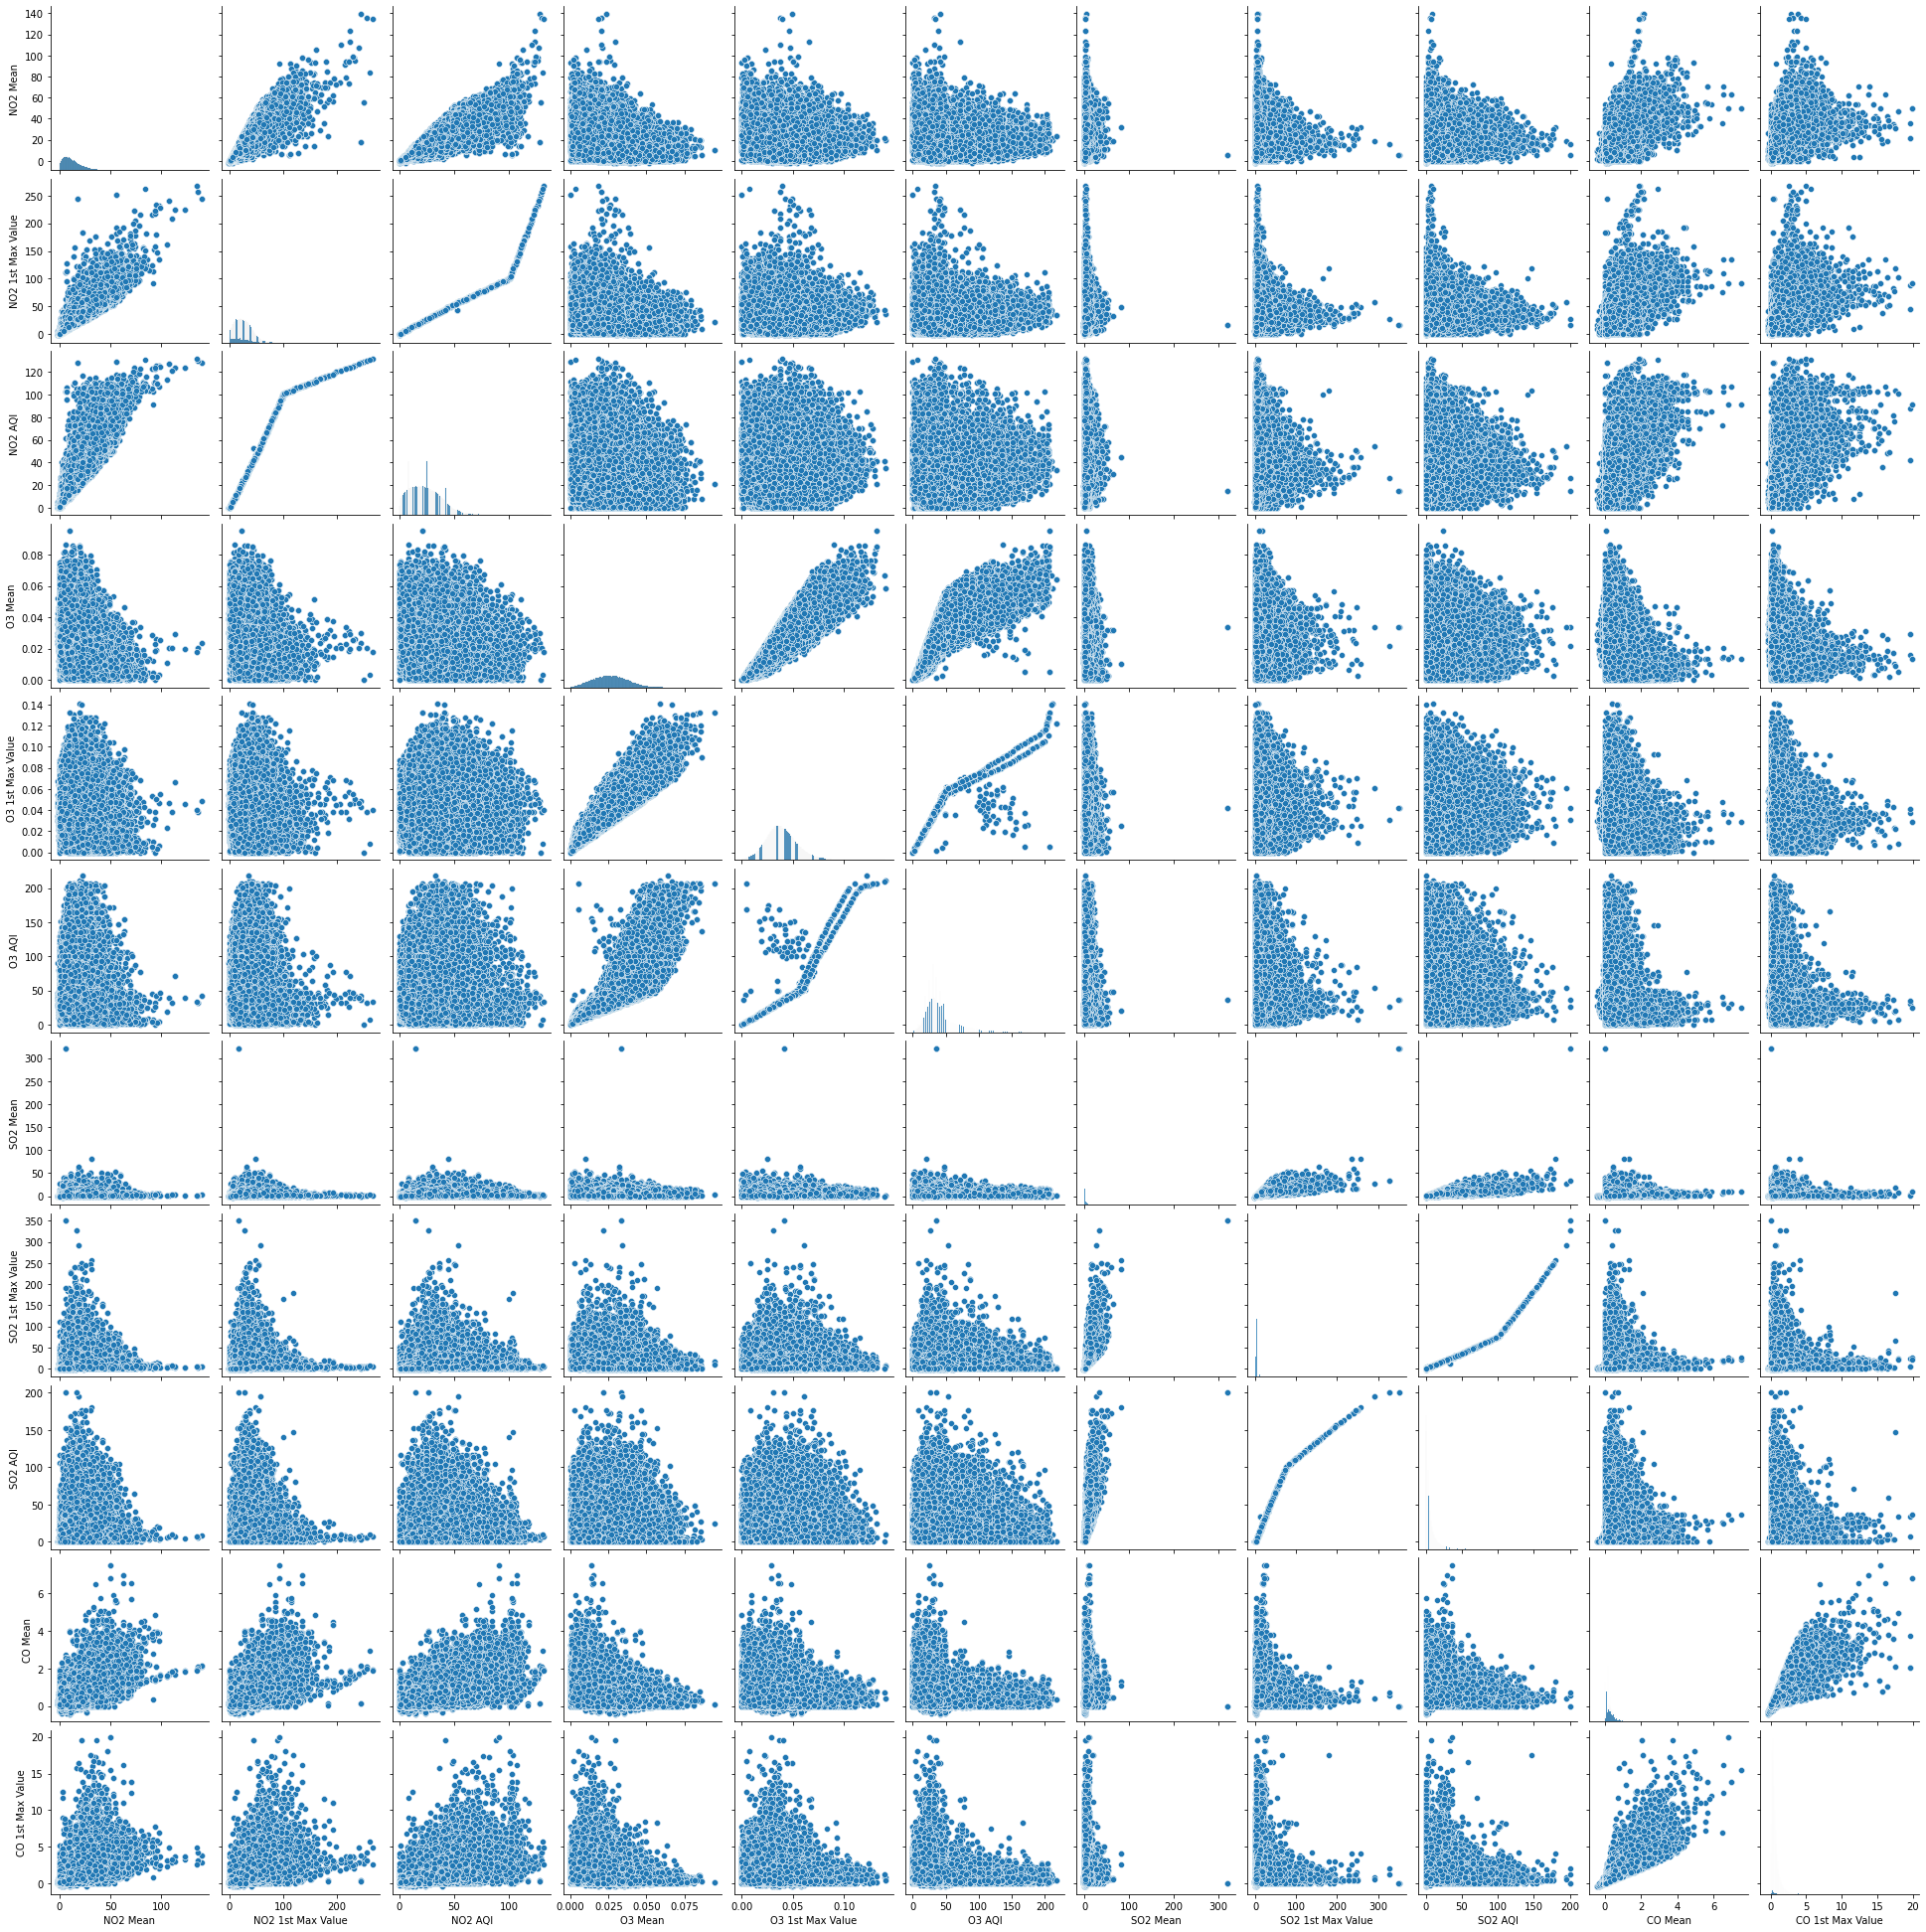

In [20]:
sns.pairplot(X_train)

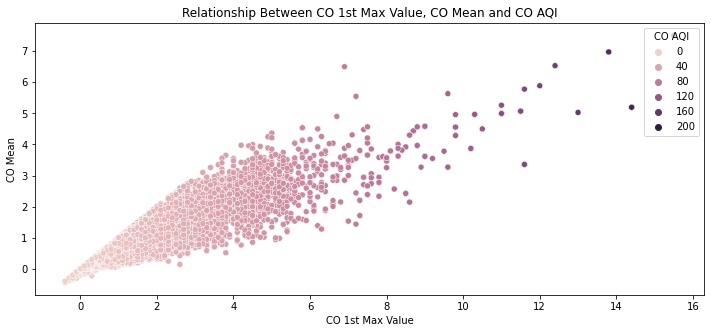

In [21]:
#EDA
plt.figure(figsize=(12,5)) # figure size 
sns.scatterplot(data=X_train, 
                x='CO 1st Max Value', 
                y="CO Mean", 
                hue=y_train, 
                )
plt.title("Relationship Between CO 1st Max Value, CO Mean and CO AQI")
plt.legend(title = "CO AQI",loc='upper right')
#plt.ylabel('Education')
plt.show()

### Insights: 
- The higher the CO 1st max value the higher the CO AQI
- There is a strong relationship between CO 1st max value and CO mean 

In [22]:
X_train.update(X_train['SO2 AQI'].fillna(method="ffill"))
X_train.update(X_train['SO2 AQI'].fillna(method="bfill"))
y_train.update(y_train.fillna(method="ffill"))
y_train.update(y_train.fillna(method="bfill"))
X_test.update(X_test['SO2 AQI'].fillna(method="ffill"))
X_test.update(X_test['SO2 AQI'].fillna(method="bfill"))
y_test.update(y_train.fillna(method="ffill"))
y_test.update(y_test.fillna(method="bfill"))

C:\Users\SarOonh\anaconda3\lib\site-packages\pandas\core\frame.py:6599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [23]:
X_train.isnull().sum()

NO2 Mean             0
NO2 1st Max Value    0
NO2 AQI              0
O3 Mean              0
O3 1st Max Value     0
O3 AQI               0
SO2 Mean             0
SO2 1st Max Value    0
SO2 AQI              0
CO Mean              0
CO 1st Max Value     0
dtype: int64

In [24]:
reg_forest = RandomForestRegressor(n_estimators = 10, random_state = 42, criterion = 'mse')
reg_forest.fit(X_train, y_train)

preds_forest = reg_forest.predict(X_test)


In [32]:
print("MAE: ",mean_absolute_error(y_true=y_test, y_pred=preds_forest))

MAE:  2.9506625206976476
